# Genre Prediction
This notebook will implement multiple machine learning models to predict the genre of a given song.
- Deep Neural Network
- SVM
- Decision Tree


## Imports

We import libraries for:
- **Data handling:** `pandas`, `numpy`
- **Preprocessing & scaling:** `scikit-learn`
- **Visualization:** `matplotlib`, `seaborn`


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("../../data/processed/spotify_features.csv")

X = data
print(f"The shape of the data set is: {X.shape}")
X.head()

The shape of the data set is: (1159748, 14)


,track_name,artist_name,genre,danceability,energy,valence,acousticness,instrumentalness,liveness,speechiness,tempo,loudness,duration_sec,popularity
0,I Won't Give Up,Jason Mraz,acoustic,-0.295121,-1.244639,-1.178954,1.049226,-0.691216,-0.537222,-0.393524,0.403917,-0.189488,-0.062859,3.123384
1,93 Million Miles,Jason Mraz,acoustic,0.187328,-0.686411,0.221331,0.437937,-0.691179,-0.624753,-0.528338,0.631455,-0.229613,-0.221997,1.990284
2,Do Not Let Me Go,Joshua Hyslop,acoustic,-0.696259,-1.499723,-1.156609,0.046373,-0.691079,-0.664042,-0.477093,0.619702,-0.832373,-0.606319,2.430934
3,Fast Car,Boyce Avenue,acoustic,-0.788412,-1.436876,0.195262,1.367548,-0.691216,-0.712781,-0.445557,2.806734,-0.152002,0.366301,2.493884
4,Sky's Still Blue,Andrew Belle,acoustic,-0.582422,0.559434,-0.888469,-0.701259,-0.638350,-0.562088,-0.493649,1.695337,0.626921,-0.035059,2.242084


In [3]:
# 0.001
RANDOM_STATE = 42

X_genres = X["genre"].unique()

## Visualization
We want to see that there is a semi equivalent split of songs per genre

In [4]:
counts = X["genre"].value_counts().sort_values(ascending=True)
# genre_sorted.head()
plt.figure(figsize=(10, max(4, len(counts) * 0.15)))

min_genre = counts.idxmin()
min_count = counts.loc[min_genre]
max_genre = counts.idxmax()
max_count = counts.loc[max_genre]

# second_min = min_genre + 1
# print(second_min)


print(f"Genres in data set: {len(counts)}")
print(f"Genre with the least counts: {min_genre} ({min_count})")
print(f"Genre with the most counts: {max_genre} ({max_count})")

show_plot = False
if show_plot:
    sns.set_style("whitegrid")
    sns.barplot(x=counts.values, y=counts.index, palette="viridis")
    plt.xlabel("Count")
    plt.ylabel("Genre")
    plt.title("Count of each genre")
    plt.tight_layout()
    plt.show()
#
# song_writer = X[X['genre'] == "songwriter"]
# # song_writer.head()
#
# artists = song_writer['artist_name'].unique()
# print(artists)


Genres in data set: 82
Genre with the least counts: songwriter (589)
Genre with the most counts: black-metal (21837)


<Figure size 1000x1230 with 0 Axes>

We will generate a sample data set, consisting of an equal amount of tracks for each song. 50 Tracks.

(test results of undersampling vs oversampling vs taking a subset)

In [5]:
# consider taking top 10 multiple genres, etc.
# explore class weights / penalize

def make_sample(X, attr, n, rs=RANDOM_STATE):
    genres = X[attr].unique()
    sample = pd.DataFrame(columns=X.columns)

    for genre in genres:
        genre_set = X[X[attr] == genre]
        if len(genre_set) == 0:
            print(genre)
        # print(genre_set.head())
        subset = genre_set.sample(n=n, random_state=rs)
        sample = pd.concat([sample, subset], axis=0)

    og_genres = X[attr].unique()
    sample_genres = sample[attr].unique

    return sample


n = 500
sample = make_sample(X, "genre", n=n, rs=RANDOM_STATE)
# print("Head")
# print(sample.head())
# print("\nTail")
# print(sample.tail())


/var/folders/p7/s_lb0zps10nggb3lkc99g6kh0000gn/T/ipykernel_28776/3187571281.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sample = pd.concat([sample, subset], axis=0)


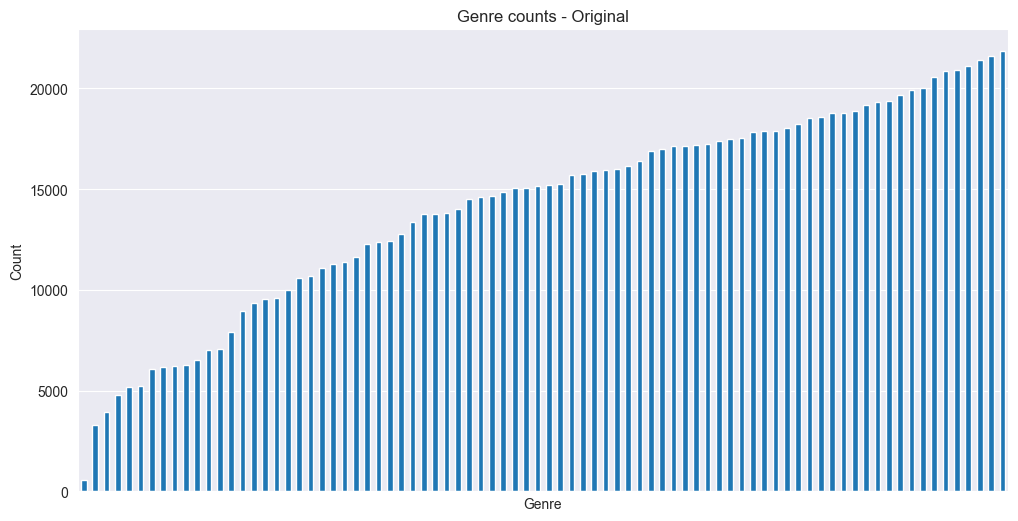

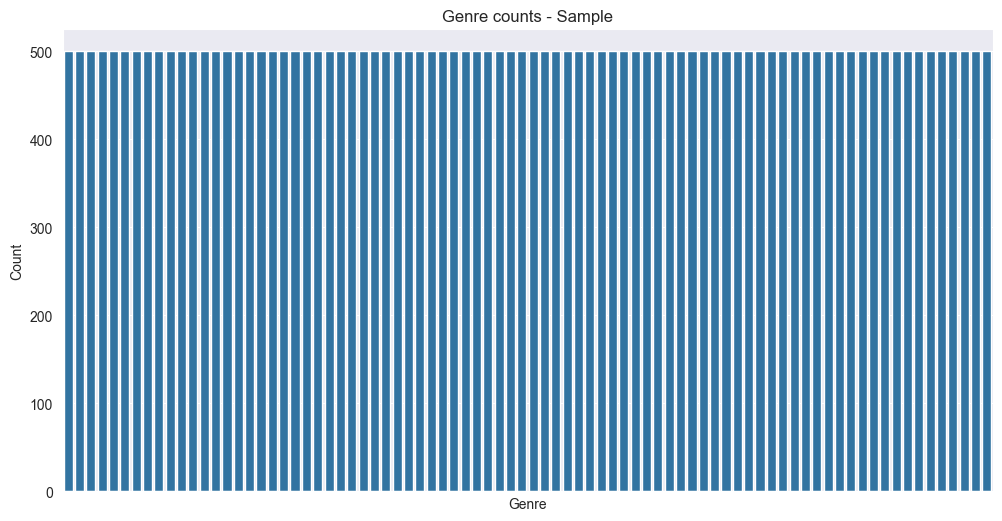

In [6]:
counts = X['genre'].value_counts()
sorted_counts = counts.sort_values()
fig = (12, 6)
plt.figure(figsize=fig)
sorted_counts.plot(kind="bar", figsize=fig)
# plt.bar(x=)
plt.title("Genre counts - Original")
plt.xticks([])
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=fig)
sns.countplot(x=sample['genre'])
plt.title("Genre counts - Sample")
plt.xticks([])
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

## Model Preparation
- encode categorical data (genre)
- Train test split for fitting and prediction

In [7]:
## one hot encoding not a good solution for this many classes (82). High dimensionality = bad
# sample_encode = pd.get_dummies(sample, columns=["genre"], drop_first=True)
# sample_encode.head()



le = LabelEncoder()
# encoded_data = le.fit_transform(sample)
# encoded_data.head()

# y = np.where(y, )
# X_train, X_test, y_train, y_temp = train_test_split(X, y, )